# Qn: Which variables affect the selling price of a Honda Vezel 1.5A X the most?

### Our Motivation

Nanyang Technological University is an academic institution located in the western region of Singapore, secluded from the rest of Singapore. Due to long commuting hours, it was decided to buy a second-hand car for a more cost-effective approach. Thus, this has led to our question, “Which variables affect the selling price of a Honda Vezel 1.5A X the most, to obtain the most value for our money?”

We used a dataset from Kaggle "https://www.kaggle.com/datasets/jiantay33/singapore-used-car"

### Setting the Stage

Cleaning our Dataset:

First, we have to clean our dataset. We have done that by first removing duplicate values and also removing N.A. values. This is because we do not want duplicate and N.A. values to give us the wrong result. 

Next, since all the categories in this dataset are labelled as "object", we want to change it to a suitable label such that we can plot them on graphs. In this case, we have converted Price, Mileage, COE, Manufactured, No. of Owners, Depreciation, and Power into float64. We then create Age from 2021 (the year this dataset was released) minus Manufactured, which gives us the Age of the car. 

Then, we remove unusable car brands like "3", "5" and "S-Class" etc. as we do not need them in our dataset.

Exploratory Data Analysis:

First, we plot all the car types against price in a box plot. We determine which car types are the most suitable for us. We have shortlisted SUVs, Mid-Sized Sedans and Hatchback cars. This is because we do not have the budget to purchase high-end cars like Sports cars. Also, we only have a Class 3 License and therefore cannot purchase buses and vans.

Next, we isolate the specific car brand we want. We have chosen Honda as it has the most number of entries in our histogram plot. Now we have shortlisted our car to - a Honda, which is either an SUV, Mid-Sized Sedan or Hatchback.  

Then, we took into consideration that Honda Vezel 1.5AX has the most number of entries amongst all the Honda cars in our cleaned dataset. Honda Vezel 1.5AX is also popular in Singapore due to its reliability, fuel efficiency and sustainability. Therefore we have chosen Honda Vezel 1.5A X to be researched to determine which variable affects its selling price the most.

This in turn removes the variable Power, as it will be redundant since all the cars are Honda Vezel 1.5A X.

### Our Analysis

Heatmap and Correlation value:

First, we plot a joint heatmap to get the correlation value for all the independent variables we have used, namely: Age, Mileage, COE, Depreciation, No. of Owners, OMV and Dereg Value, against our dependent variable Price of the car. After observation, we have chosen to remove No. of Owners as it shows the lowest correlation among all the variables. 

We are thus left with Age, Mileage, COE, Depreciation, OMV and Dereg Value as our independent variables (total = 6 independent + 1 dependent).

Multiple Linear Regression:

We used multiple linear regression to show which factors influence the price of the car the most.

Hypothesis Testing:

We used hypothesis testing to show that 

### Conclusion

In conclusion, we have determined that we love cars

# Importing our Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from datetime import datetime
from scipy.stats import f_oneway

sb.set()

In [2]:
cardata = pd.read_csv("SG_usedcar.csv")
cardata

,Brand,Type,Reg_date,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE,Engine Cap,Curb Weight,Manufactured,Transmission,OMV,ARF,Power,No. of Owners,Price,Unnamed: 18
0,BMW 5 Series 520i Highline,Luxury Sedan,28-May-13,1yr 11mths 21days COE left),15920,N.A,1210,38133,67304,1997,1610,2013,Auto,41566,45193,135,1,54000,NaN
1,Honda Vezel 1.5A X Honda Sensing,SUV,14-Oct-15,4yrs 4mths 7days COE left),10310,50000,682,31237,56001,1496,1190,2015,Auto,19775,9775,96,2,49800,NaN
2,MINI One 1.6A (New 10-yr COE),Hatchback,7-Oct-11,10yrs COE left),6280,110000,742,N.A,N.A,1598,1100,2011,Auto,18180,18180,72,3,62800,NaN
3,Hyundai Avante 1.6A (COE till 02/2029),Mid-Sized Sedan,12-Feb-09,7yrs 8mths 5days COE left),N.A,N.A,959,N.A,25727,1591,1264,2009,Auto,10763,10763,89,3,N.A,NaN
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,28-Dec-07,1yr 6mths 21days COE left),8210,203000,1030,6656,21349,1586,1060,2007,Manual,12154,13370,92,2,12800,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,Mercedes-Benz C-Class C180,Luxury Sedan,20-Dec-13,2yrs 6mths 13days COE left),15240,127000,740,35772,73989,1595,1485,2013,Auto,29525,28335,115,4,52828,NaN
4407,Mazda 3 1.5A Sunroof,Mid-Sized Sedan,7-Dec-17,6yrs 6mths COE left),9340,40200,682,35419,42801,1496,1310,2017,Auto,15108,10108,88,3,65800,NaN
4408,Toyota Hiace 2.5A (COE till 02/2022),Bus/Mini Bus,8-Feb-07,8mths 1day COE left),26410,N.A,N.A,3269,24252,2494,1800,2006,Auto,N.A,27970,6,N.A,17800,NaN
4409,Subaru Forester 2.0i-L Sunroof,SUV,29-Jul-15,4yrs 1mth 22days COE left),10590,120000,1208,39265,74501,1995,1566,2015,Auto,13772,13772,110,1,50800,NaN


# Exploratory Data Analysis 

# Cleaning our Dataset

In [3]:
#Cleaning the data
def extract_company_name(car_model):
    return car_model.split(' ')[0]

cardata['Company_Name'] = cardata['Brand'].apply(extract_company_name)

#Removing duplicates
cardata.drop_duplicates(inplace=True)

#Fill in missing values
#cardata.fillna(value='default_value', inplace=True)  
# Replace 'default_value' with an appropriate value or method

#Remove all N.A in column Price(Important factor to be considered, if missing data is pointless)
# List of columns to clean
cols_to_clean = ['Price', 'Mileage', 'COE', 'Dep', 'No. of Owners', 'OMV', 'Dereg Value']

# Loop through columns and clean the data
for col in cols_to_clean:
    cardata[col].replace('N.A', float('nan'), inplace=True)
    cardata[col].replace('N.A.', float('nan'), inplace=True)
    cardata.dropna(subset=[col], inplace=True)


#Change data to numeric instead of objects
to_numeric_var = ['Price', 'Mileage', 'COE', 'Manufactured', 'Power', 'No. of Owners', 'Dep', 'OMV', 'Dereg Value','Road Tax']
for var in to_numeric_var:
    cardata[var] = pd.to_numeric(cardata[var], errors='coerce')


#Create Age
cardata['Age'] = 2021 - cardata['Manufactured']

cardata.dropna(subset=['Age'], inplace=True)


#Remove all unusable brand names
for x in cardata["Company_Name"]:
        if (x == "3" or x == "S-Class" or x == "UD" or x == "5" or x == "E-Class" or x == "RUF" or x == "C-Class"):
            cardata = cardata[cardata["Company_Name"]!= x]

cardata


,Brand,Type,Reg_date,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE,Engine Cap,...,Manufactured,Transmission,OMV,ARF,Power,No. of Owners,Price,Unnamed: 18,Company_Name,Age
1,Honda Vezel 1.5A X Honda Sensing,SUV,14-Oct-15,4yrs 4mths 7days COE left),10310,50000,682,31237,56001,1496,...,2015,Auto,19775,9775,96,2,49800,NaN,Honda,6
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,28-Dec-07,1yr 6mths 21days COE left),8210,203000,1030,6656,21349,1586,...,2007,Manual,12154,13370,92,2,12800,NaN,Suzuki,14
5,Porsche 718 Cayman 2.0A PDK,Sports Car,19-Jul-17,6yrs 1mth 12days COE left),34200,21000,1200,106829,50110,1988,...,2017,Auto,71979,101563,220,1,259988,NaN,Porsche,4
13,Hyundai Elantra 1.6A Elite,Mid-Sized Sedan,14-Nov-14,3yrs 5mths 7days COE left),11010,35000,738,31339,64900,1591,...,2014,Auto,13856,13856,97,1,44800,NaN,Hyundai,7
15,Kia Cerato 1.6A GT Line Sunroof,Mid-Sized Sedan,4-Jul-19,8yrs 27days COE left),9450,21200,738,38416,30009,1591,...,2018,Auto,18894,18894,93,1,85800,NaN,Kia,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,BMW 5 Series 520i,Luxury Sedan,22-Feb-18,6yrs 8mths 15days COE left),17990,55000,1210,68148,39000,1998,...,2017,Auto,45675,55945,135,2,148800,NaN,BMW,4
4405,Subaru Forester 2.0X (COE till 12/2024),SUV,3-Apr-10,3yrs 6mths 25days COE left),7500,172892,1447,14045,19657,1994,...,2010,Auto,19090,19090,110,3,26800,NaN,Subaru,11
4406,Mercedes-Benz C-Class C180,Luxury Sedan,20-Dec-13,2yrs 6mths 13days COE left),15240,127000,740,35772,73989,1595,...,2013,Auto,29525,28335,115,4,52828,NaN,Mercedes-Benz,8
4407,Mazda 3 1.5A Sunroof,Mid-Sized Sedan,7-Dec-17,6yrs 6mths COE left),9340,40200,682,35419,42801,1496,...,2017,Auto,15108,10108,88,3,65800,NaN,Mazda,4


## Plotting Price against Type of Car

<AxesSubplot: xlabel='Type', ylabel='Price'>

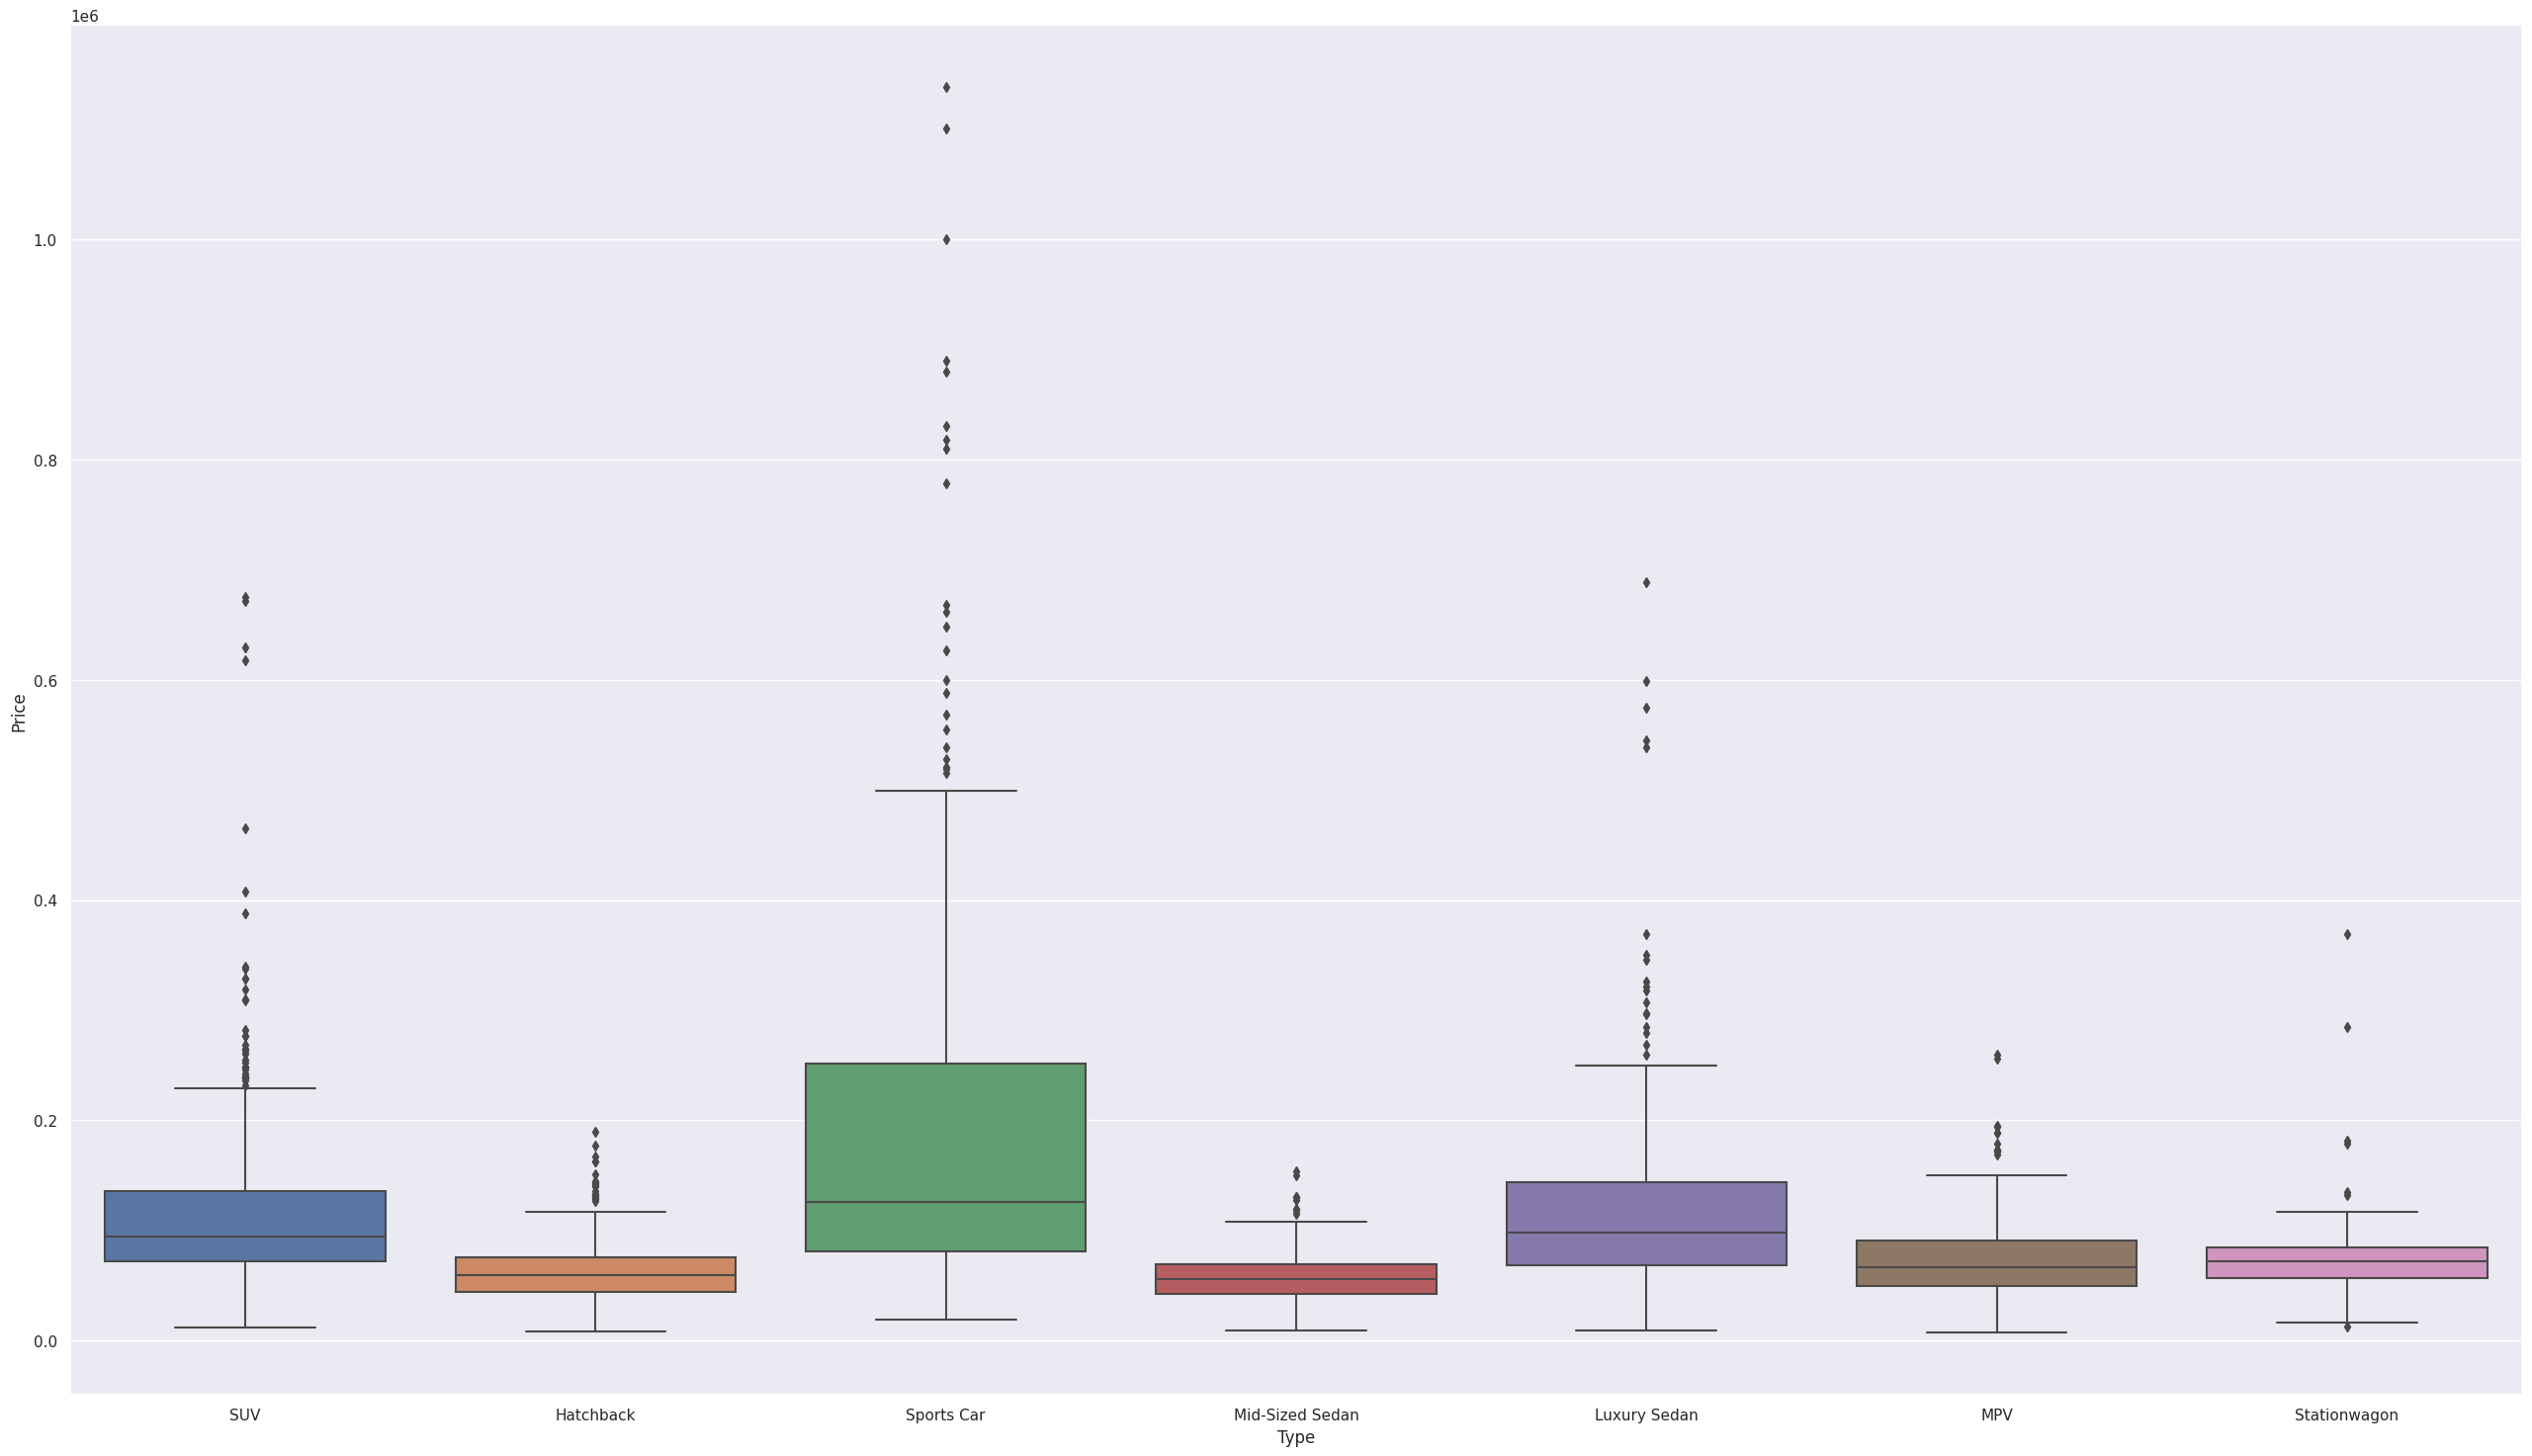

In [4]:
f = plt.figure(figsize=(32, 18))
sb.boxplot(x='Type', y='Price', data=cardata)

Based on this box plot, we can determine that a mid-sized sedan is the type that best suit our needs. It has a lower median compared to the rest of the types of cars. While vans and buses have a lower median, a Class 4 license is required and daily driving them is simply too impractical. Our group has chose Mid-sized Sedans, MPVs and Hatchback as they have the lowest median cost while still being practical for our use case. A Sports Car and Luxury Sedans Median Price is way out of budget and many MPVs are not fuel efficient at all.


## SUV, Mid-Sized Sedan, Hatchback 

In [5]:
for x in cardata["Type"]:
        if (x != "SUV" and x != "Mid-Sized Sedan" and x != "Hatchback"):
            cardata = cardata[cardata["Type"]!= x]
cardata

,Brand,Type,Reg_date,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE,Engine Cap,...,Manufactured,Transmission,OMV,ARF,Power,No. of Owners,Price,Unnamed: 18,Company_Name,Age
1,Honda Vezel 1.5A X Honda Sensing,SUV,14-Oct-15,4yrs 4mths 7days COE left),10310,50000,682,31237,56001,1496,...,2015,Auto,19775,9775,96,2,49800,NaN,Honda,6
4,Suzuki Swift Sport 1.6M (COE till 12/2022),Hatchback,28-Dec-07,1yr 6mths 21days COE left),8210,203000,1030,6656,21349,1586,...,2007,Manual,12154,13370,92,2,12800,NaN,Suzuki,14
13,Hyundai Elantra 1.6A Elite,Mid-Sized Sedan,14-Nov-14,3yrs 5mths 7days COE left),11010,35000,738,31339,64900,1591,...,2014,Auto,13856,13856,97,1,44800,NaN,Hyundai,7
15,Kia Cerato 1.6A GT Line Sunroof,Mid-Sized Sedan,4-Jul-19,8yrs 27days COE left),9450,21200,738,38416,30009,1591,...,2018,Auto,18894,18894,93,1,85800,NaN,Kia,3
21,Mitsubishi Lancer EX 2.0A GLS (COE till 03/2028),Mid-Sized Sedan,28-Mar-08,6yrs 9mths 21days COE left),7470,251000,1694,30648,44998,1998,...,2007,Auto,17722,17722,114,2,50900,NaN,Mitsubishi,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400,Nissan X-Trail 2.0A 7-Seater Sunroof,SUV,24-Jun-15,4yrs 17days COE left),13080,77702,1210,44601,70890,1997,...,2015,Auto,21934,22708,106,2,64300,NaN,Nissan,6
4401,Mercedes-Benz A-Class A180 Style,Hatchback,26-Sep-17,6yrs 3mths 19days COE left),14370,33574,740,42434,45201,1595,...,2017,Auto,22548,18568,90,2,99888,NaN,Mercedes-Benz,4
4405,Subaru Forester 2.0X (COE till 12/2024),SUV,3-Apr-10,3yrs 6mths 25days COE left),7500,172892,1447,14045,19657,1994,...,2010,Auto,19090,19090,110,3,26800,NaN,Subaru,11
4407,Mazda 3 1.5A Sunroof,Mid-Sized Sedan,7-Dec-17,6yrs 6mths COE left),9340,40200,682,35419,42801,1496,...,2017,Auto,15108,10108,88,3,65800,NaN,Mazda,4


## Choosing the Brand of Car

<AxesSubplot: xlabel='Company_Name', ylabel='Count'>

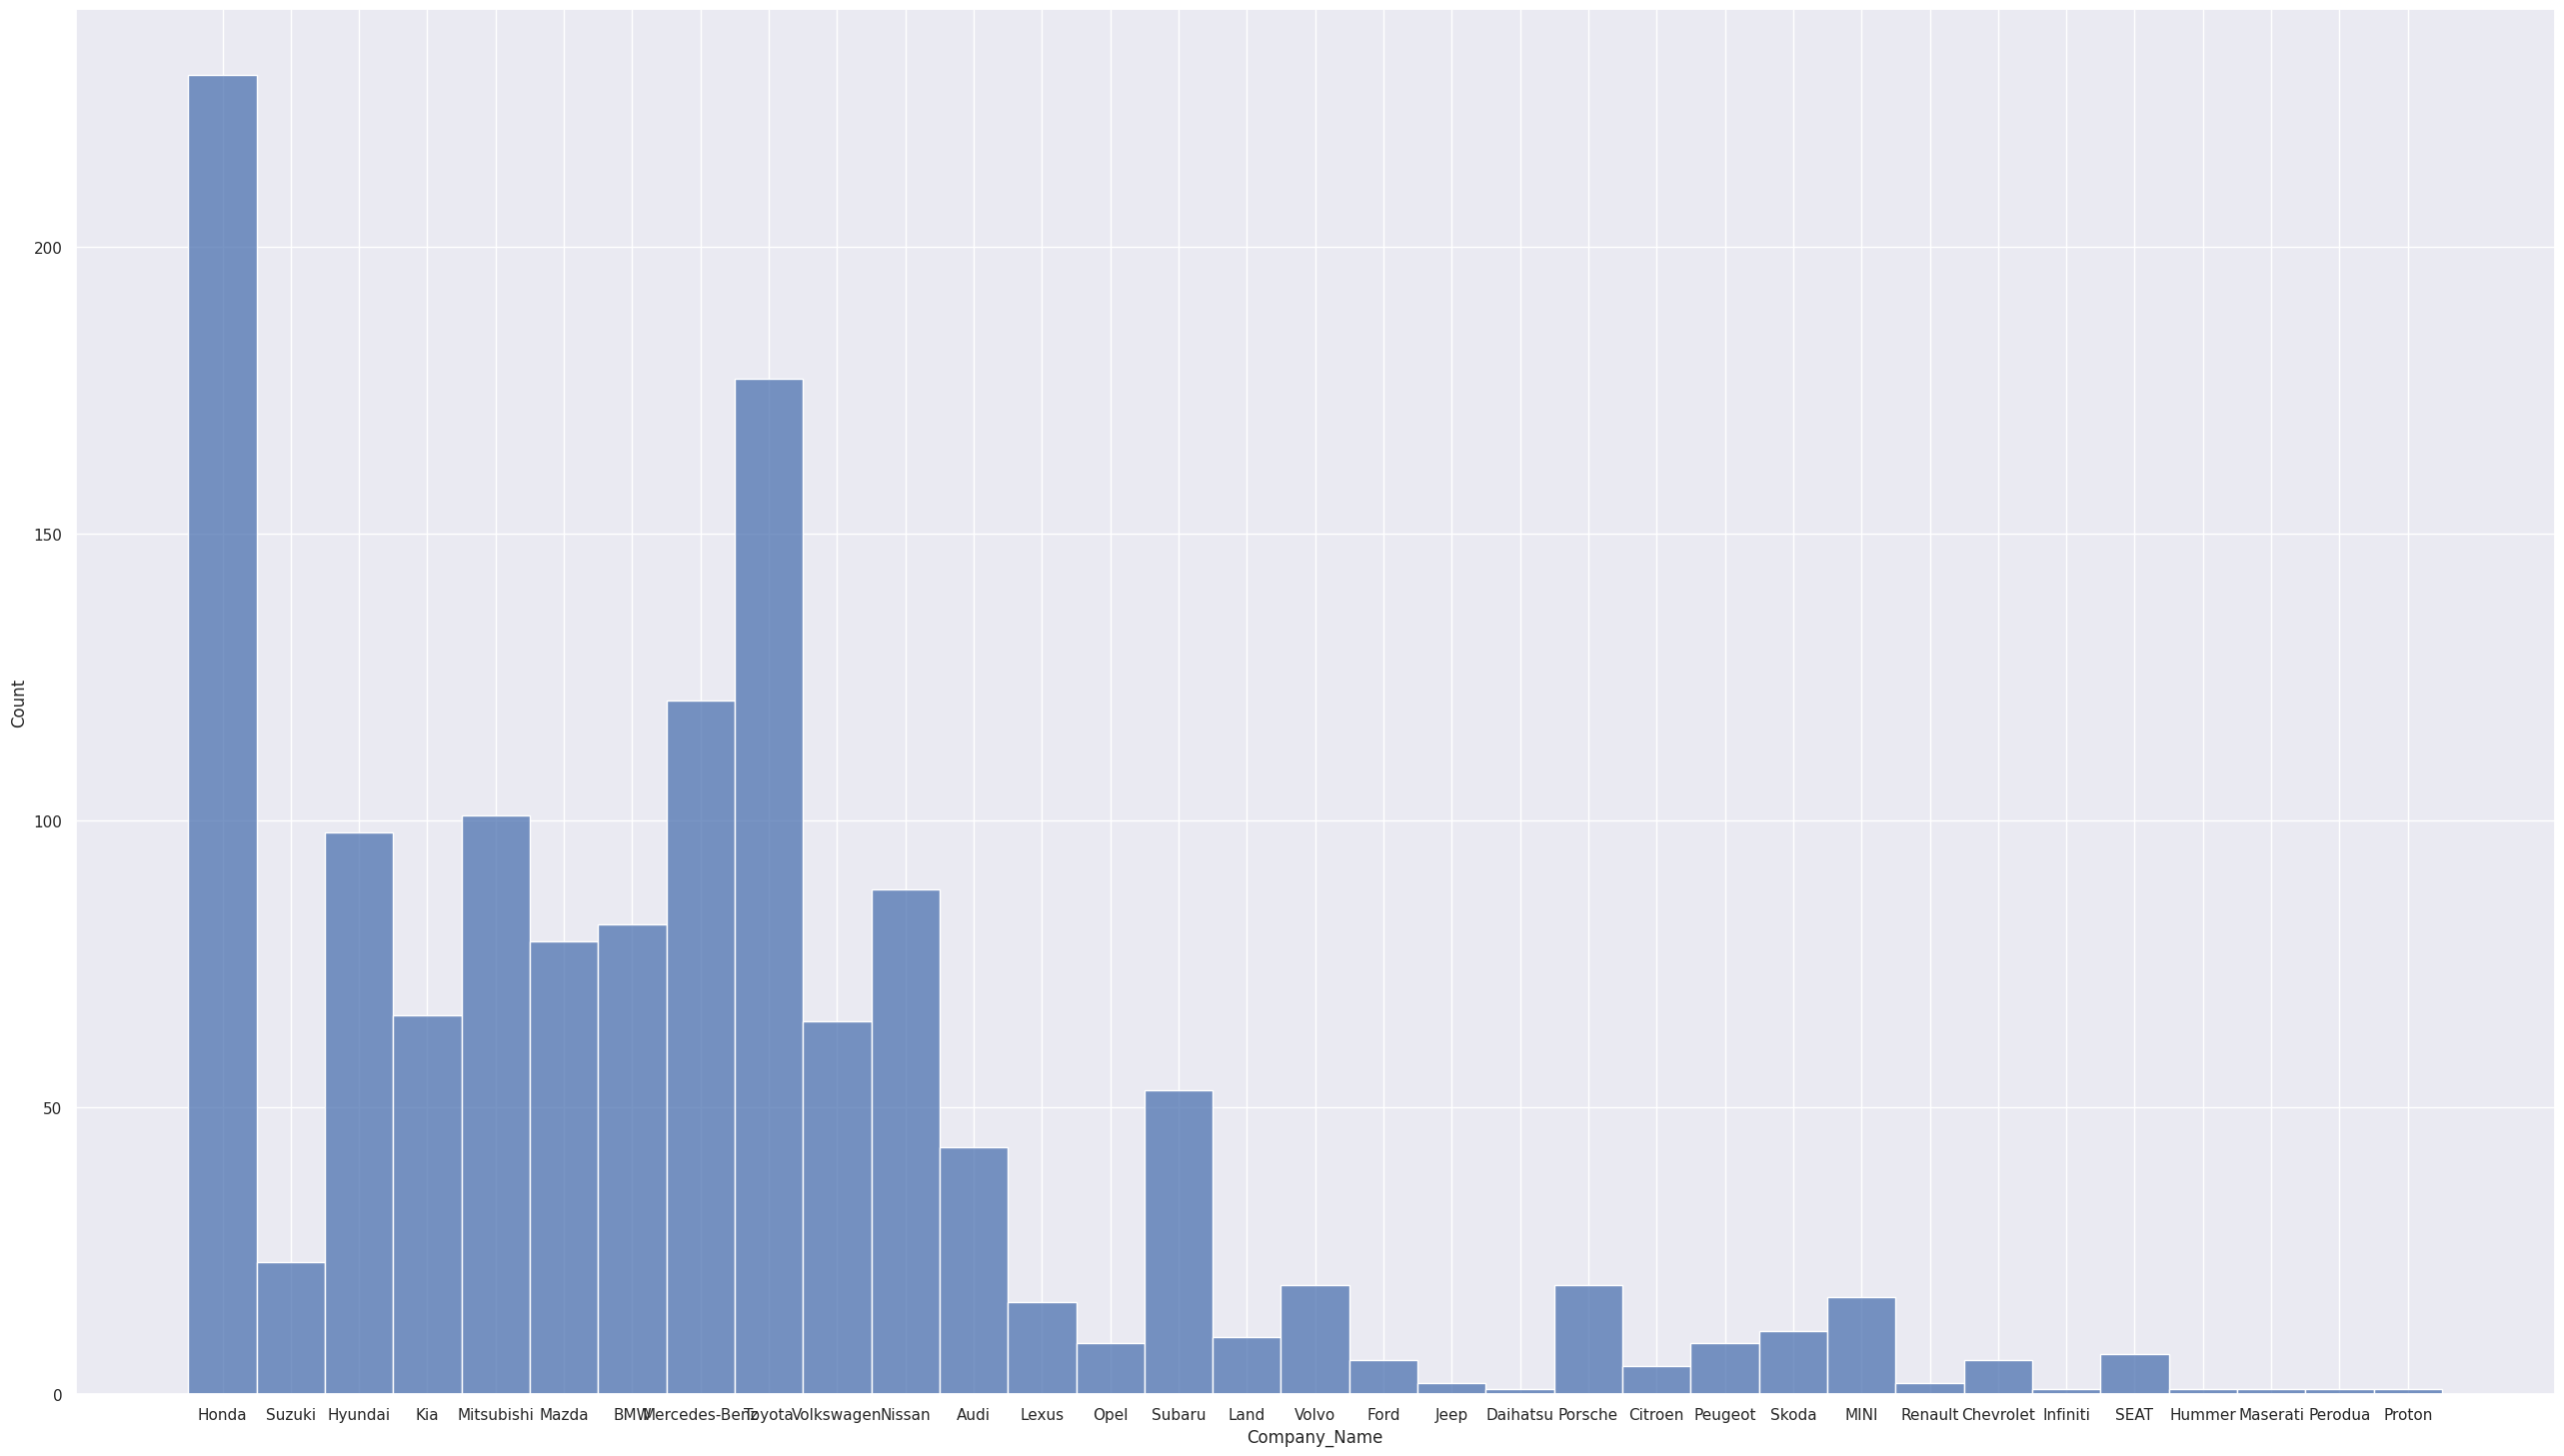

In [6]:
f = plt.figure(figsize=(32, 18))
sb.histplot(x='Company_Name', data=cardata)

Based on this histogram, we have decided to choose Honda as it has the most number of entries. If there are many such cars on the road, it means that maintainance for the car is cheaper and more available.

We have also decided to choose Honda Vezel 1.5AX, as it is the most popular car in Singapore currently, and it perfectly suits our needs.

Now that we have cleaned up the dataset and isolated the car brand we want, let's explore the data set to determine the correlation between the variables and the price.

In [7]:
for x in cardata["Company_Name"]:
        if (x != "Honda"):
            cardata = cardata[cardata["Company_Name"]!= x]

cardata['Car_Model'] = [x.split()[0] + ' ' + x.split()[1] + ' ' + x.split()[2] for x in cardata['Brand']]

cardata

,Brand,Type,Reg_date,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE,Engine Cap,...,Transmission,OMV,ARF,Power,No. of Owners,Price,Unnamed: 18,Company_Name,Age,Car_Model
1,Honda Vezel 1.5A X Honda Sensing,SUV,14-Oct-15,4yrs 4mths 7days COE left),10310,50000,682,31237,56001,1496,...,Auto,19775,9775,96,2,49800,NaN,Honda,6,Honda Vezel 1.5A
52,Honda Civic 1.5A VTEC Turbo Sunroof,Mid-Sized Sedan,7-Oct-16,5yrs 4mths COE left),12750,80000,684,48059,57010,1498,...,Auto,26078,23510,127,1,79800,NaN,Honda,5,Honda Civic 1.5A
90,Honda HR-V 1.5A LX,SUV,17-Aug-18,7yrs 2mths 10days COE left),9590,42254,682,39851,32699,1496,...,Auto,21245,21743,96,1,79888,NaN,Honda,3,Honda HR-V 1.5A
91,Honda Civic 1.8A (COE till 06/2023),Mid-Sized Sedan,2-Jun-08,1yr 11mths 26days COE left),9310,155000,1271,7529,18953,1799,...,Auto,21141,23256,103,3,18500,NaN,Honda,13,Honda Civic 1.8A
106,Honda Vezel 1.5A X,SUV,7-May-15,3yrs 11mths COE left),11360,121800,682,32433,68589,1496,...,Auto,18556,8556,96,2,48800,NaN,Honda,7,Honda Vezel 1.5A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,Honda Civic 1.6A VTi,Mid-Sized Sedan,2-Aug-19,8yrs 1mth 26days COE left),10020,22000,742,36846,26667,1597,...,Auto,20084,20118,92,1,91800,NaN,Honda,2,Honda Civic 1.6A
4349,Honda Jazz 1.5A RS,Hatchback,12-Jan-16,4yrs 7mths 5days COE left),9480,96600,684,32257,54301,1498,...,Auto,15377,10377,96,2,48800,NaN,Honda,6,Honda Jazz 1.5A
4357,Honda Jazz 1.5A,Hatchback,15-Dec-14,3yrs 6mths 8days COE left),11290,89408,684,27838,67889,1498,...,Auto,16000,6000,96,2,42800,NaN,Honda,7,Honda Jazz 1.5A
4385,Honda Civic 1.6A VTi (COE till 08/2030),Mid-Sized Sedan,8-Sep-10,9yrs 2mths 25days COE left),6260,130000,814,29747,32190,1595,...,Auto,22950,22950,92,3,57888,NaN,Honda,12,Honda Civic 1.6A


<AxesSubplot: xlabel='Car_Model', ylabel='Count'>

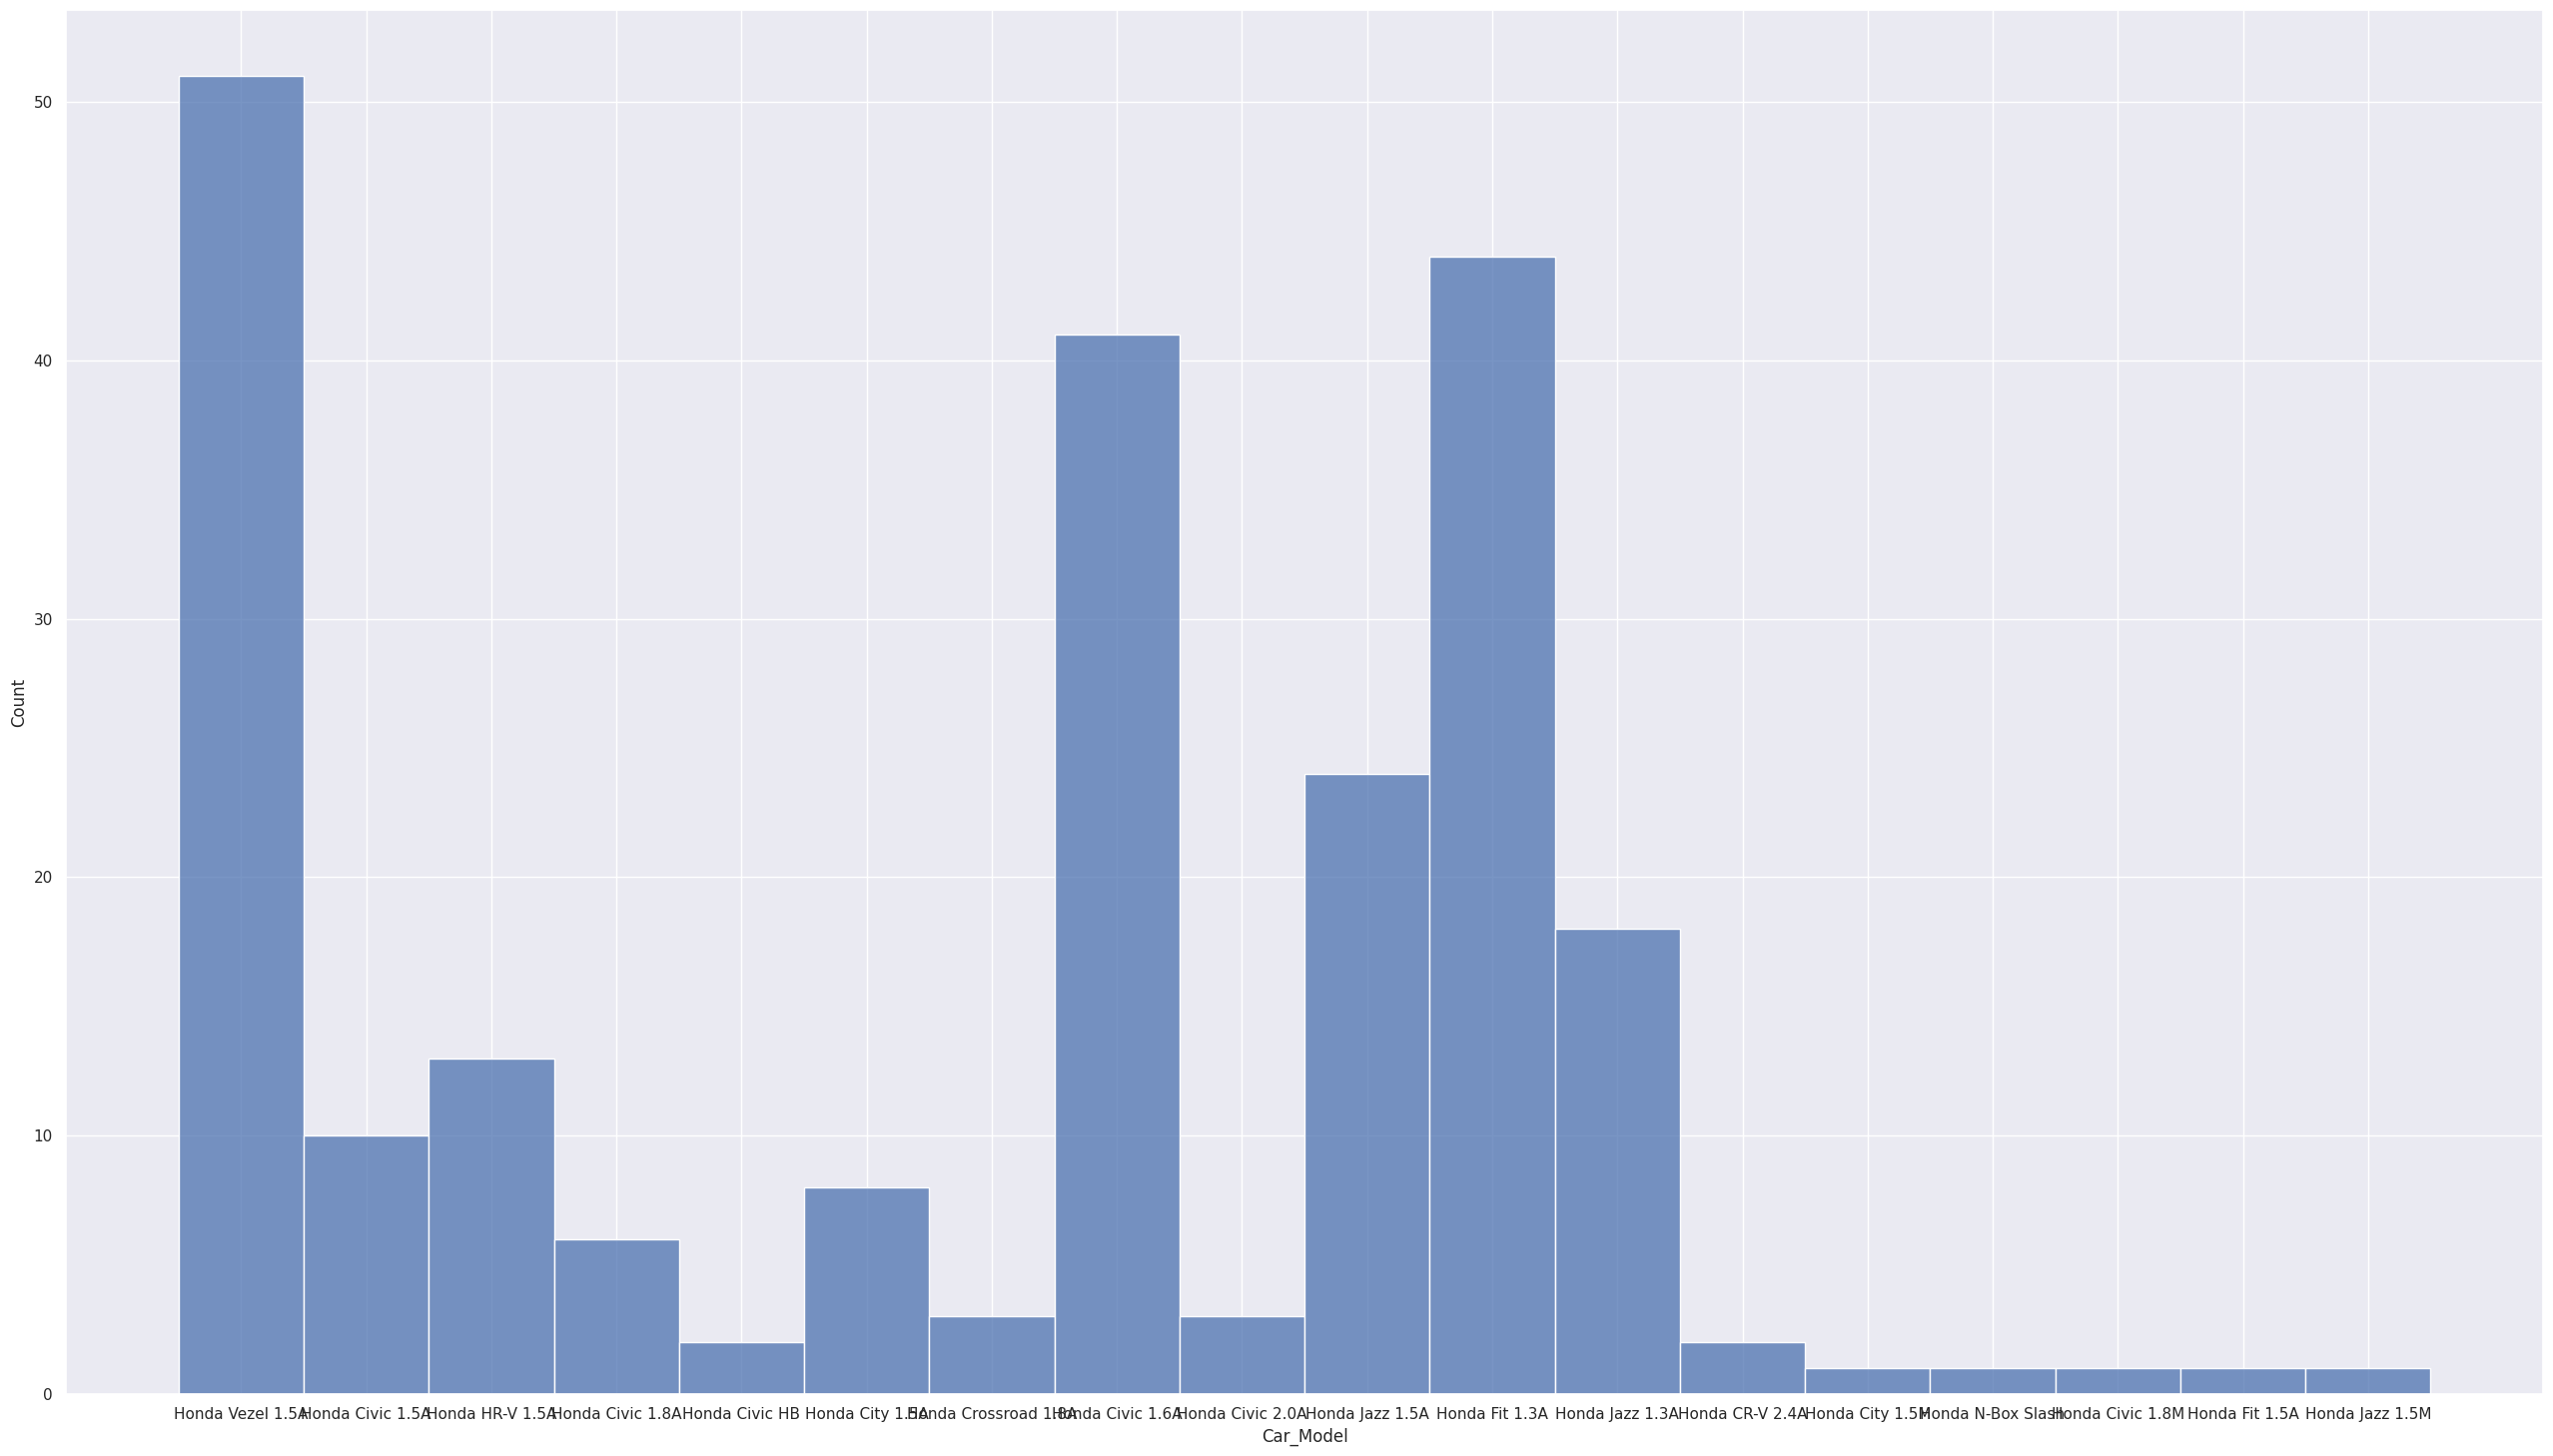

In [8]:
f = plt.figure(figsize=(32, 18))
sb.histplot(x='Car_Model', data=cardata)

In [9]:
for x in cardata['Brand']:
        if (x != 'Honda Vezel 1.5A X'):
            cardata = cardata[cardata['Brand']!= x]

cardata


,Brand,Type,Reg_date,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE,Engine Cap,...,Transmission,OMV,ARF,Power,No. of Owners,Price,Unnamed: 18,Company_Name,Age,Car_Model
106,Honda Vezel 1.5A X,SUV,7-May-15,3yrs 11mths COE left),11360,121800,682,32433,68589,1496,...,Auto,18556,8556,96,2,48800,NaN,Honda,7,Honda Vezel 1.5A
284,Honda Vezel 1.5A X,SUV,4-Jan-16,4yrs 6mths 28days COE left),10320,62000,682,32453,56989,1496,...,Auto,19068,9068,96,1,51800,NaN,Honda,6,Honda Vezel 1.5A
861,Honda Vezel 1.5A X,SUV,20-May-16,4yrs 11mths 13days COE left),10210,68000,682,29855,46667,1496,...,Auto,20333,10467,96,3,55800,NaN,Honda,6,Honda Vezel 1.5A
914,Honda Vezel 1.5A X,SUV,6-Jan-17,5yrs 6mths 30days COE left),9440,71000,682,36006,48000,1496,...,Auto,21611,12256,96,3,58888,NaN,Honda,5,Honda Vezel 1.5A
962,Honda Vezel 1.5A X,SUV,26-Jan-18,6yrs 7mths 19days COE left),9950,25155,682,34623,36890,1496,...,Auto,22498,13498,96,1,72800,NaN,Honda,4,Honda Vezel 1.5A
1046,Honda Vezel 1.5A X,SUV,10-Jun-16,5yrs 3days COE left),10330,80000,682,31119,47020,1496,...,Auto,20054,10076,96,1,56800,NaN,Honda,5,Honda Vezel 1.5A
1075,Honda Vezel 1.5A X,SUV,29-Jul-16,5yrs 1mth 22days COE left),10270,80000,682,30172,44185,1496,...,Auto,19917,9917,96,1,57800,NaN,Honda,5,Honda Vezel 1.5A
1092,Honda Vezel 1.5A X,SUV,14-Jul-16,5yrs 1mth 7days COE left),10700,78000,682,35960,55200,1496,...,Auto,20272,10381,96,1,59800,NaN,Honda,6,Honda Vezel 1.5A
1750,Honda Vezel 1.5A X,SUV,27-Jun-19,8yrs 20days COE left),9680,28000,682,31873,26999,1496,...,Auto,22487,13482,96,1,84800,NaN,Honda,2,Honda Vezel 1.5A
1813,Honda Vezel 1.5A X,SUV,6-Jan-17,5yrs 6mths 30days COE left),9960,80199,682,37220,50101,1496,...,Auto,21650,12310,96,1,61800,NaN,Honda,5,Honda Vezel 1.5A


<AxesSubplot: xlabel='Price', ylabel='Brand'>

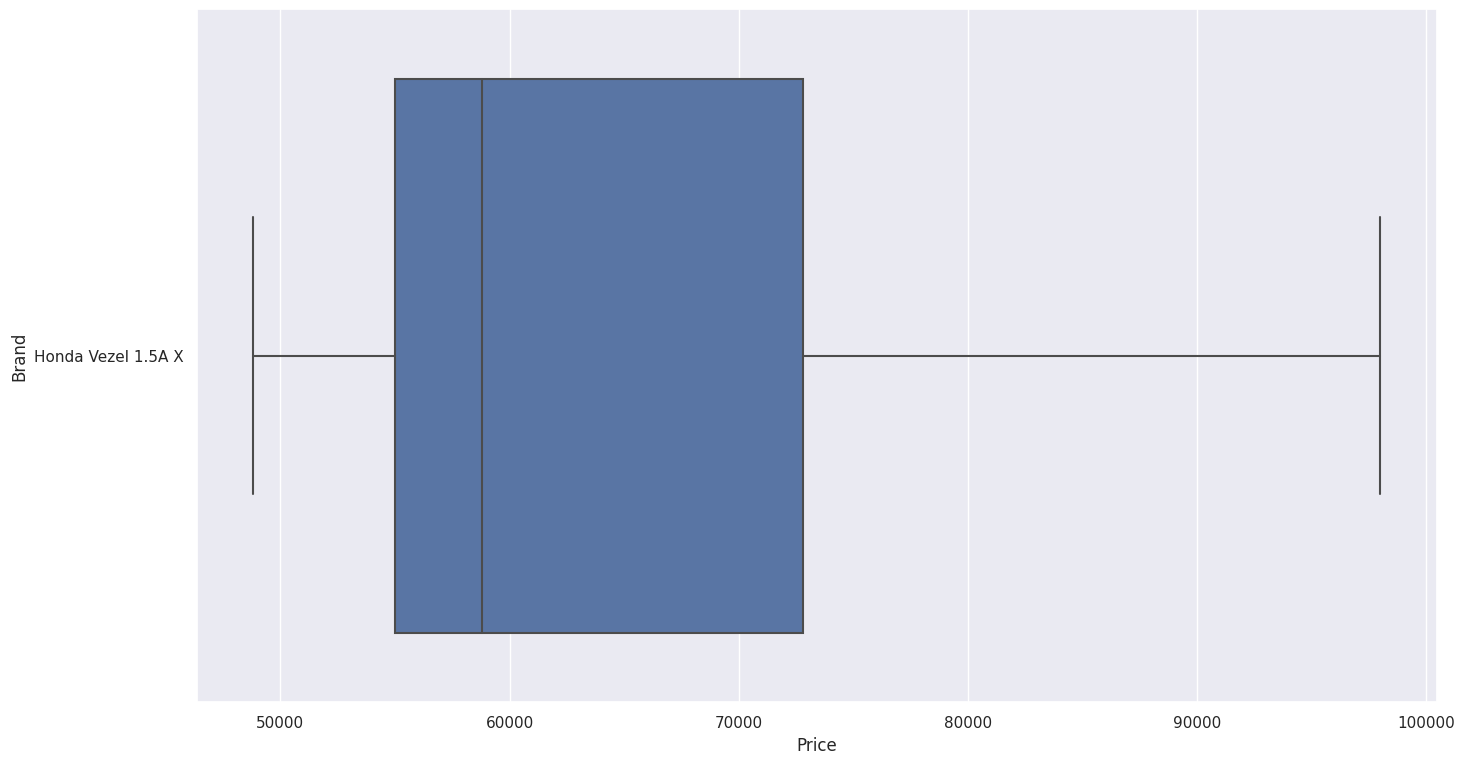

In [10]:
data=cardata
f = plt.figure(figsize=(16, 9))
sb.boxplot(y=cardata['Brand'], x=cardata['Price'])

This has removed some variables from the equation, such as Engine Cap, Power, Curb Weight from our equation. As they are too similar coming from the same brand and type of car.

Now we have finally determined our brand and type of car: Honda Vezel 1.5AX, we can check which variables correlate the most to price of this car.

# Analysis

We use 3 tools of analysis: correlation, multiple linear regression and hypothesis testing.

First we remove outliers from our shortlisted variables.

In [11]:
def remove_outlier(data, col):
    count = 0
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    print(lower_range, upper_range)
    for x in data[col]:
        if ((x < lower_range) | (x > upper_range)):
            data = data[data[col] != x]
    return count

In [12]:
#Remove Outliers

a = ['Age', 'Mileage', 'COE', 'Dep', 'OMV', 'Dereg Value', 'Price']

for var in a:
    remove_outlier(cardata, var)

cardata = cardata.reset_index(drop = True)
cardata

1.0 9.0
-28743.0 139129.0
28563.5 64383.5
8435.0 11755.0
16588.5 25176.5
21421.0 44757.0
28300.0 99500.0


,Brand,Type,Reg_date,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE,Engine Cap,...,Transmission,OMV,ARF,Power,No. of Owners,Price,Unnamed: 18,Company_Name,Age,Car_Model
0,Honda Vezel 1.5A X,SUV,7-May-15,3yrs 11mths COE left),11360,121800,682,32433,68589,1496,...,Auto,18556,8556,96,2,48800,NaN,Honda,7,Honda Vezel 1.5A
1,Honda Vezel 1.5A X,SUV,4-Jan-16,4yrs 6mths 28days COE left),10320,62000,682,32453,56989,1496,...,Auto,19068,9068,96,1,51800,NaN,Honda,6,Honda Vezel 1.5A
2,Honda Vezel 1.5A X,SUV,20-May-16,4yrs 11mths 13days COE left),10210,68000,682,29855,46667,1496,...,Auto,20333,10467,96,3,55800,NaN,Honda,6,Honda Vezel 1.5A
3,Honda Vezel 1.5A X,SUV,6-Jan-17,5yrs 6mths 30days COE left),9440,71000,682,36006,48000,1496,...,Auto,21611,12256,96,3,58888,NaN,Honda,5,Honda Vezel 1.5A
4,Honda Vezel 1.5A X,SUV,26-Jan-18,6yrs 7mths 19days COE left),9950,25155,682,34623,36890,1496,...,Auto,22498,13498,96,1,72800,NaN,Honda,4,Honda Vezel 1.5A
5,Honda Vezel 1.5A X,SUV,10-Jun-16,5yrs 3days COE left),10330,80000,682,31119,47020,1496,...,Auto,20054,10076,96,1,56800,NaN,Honda,5,Honda Vezel 1.5A
6,Honda Vezel 1.5A X,SUV,29-Jul-16,5yrs 1mth 22days COE left),10270,80000,682,30172,44185,1496,...,Auto,19917,9917,96,1,57800,NaN,Honda,5,Honda Vezel 1.5A
7,Honda Vezel 1.5A X,SUV,14-Jul-16,5yrs 1mth 7days COE left),10700,78000,682,35960,55200,1496,...,Auto,20272,10381,96,1,59800,NaN,Honda,6,Honda Vezel 1.5A
8,Honda Vezel 1.5A X,SUV,27-Jun-19,8yrs 20days COE left),9680,28000,682,31873,26999,1496,...,Auto,22487,13482,96,1,84800,NaN,Honda,2,Honda Vezel 1.5A
9,Honda Vezel 1.5A X,SUV,6-Jan-17,5yrs 6mths 30days COE left),9960,80199,682,37220,50101,1496,...,Auto,21650,12310,96,1,61800,NaN,Honda,5,Honda Vezel 1.5A


## Heatmap and Correlation

Next we create a joint heatmap and look at the last row which shows all the correlation values of our independent variables against Price.

<AxesSubplot: >

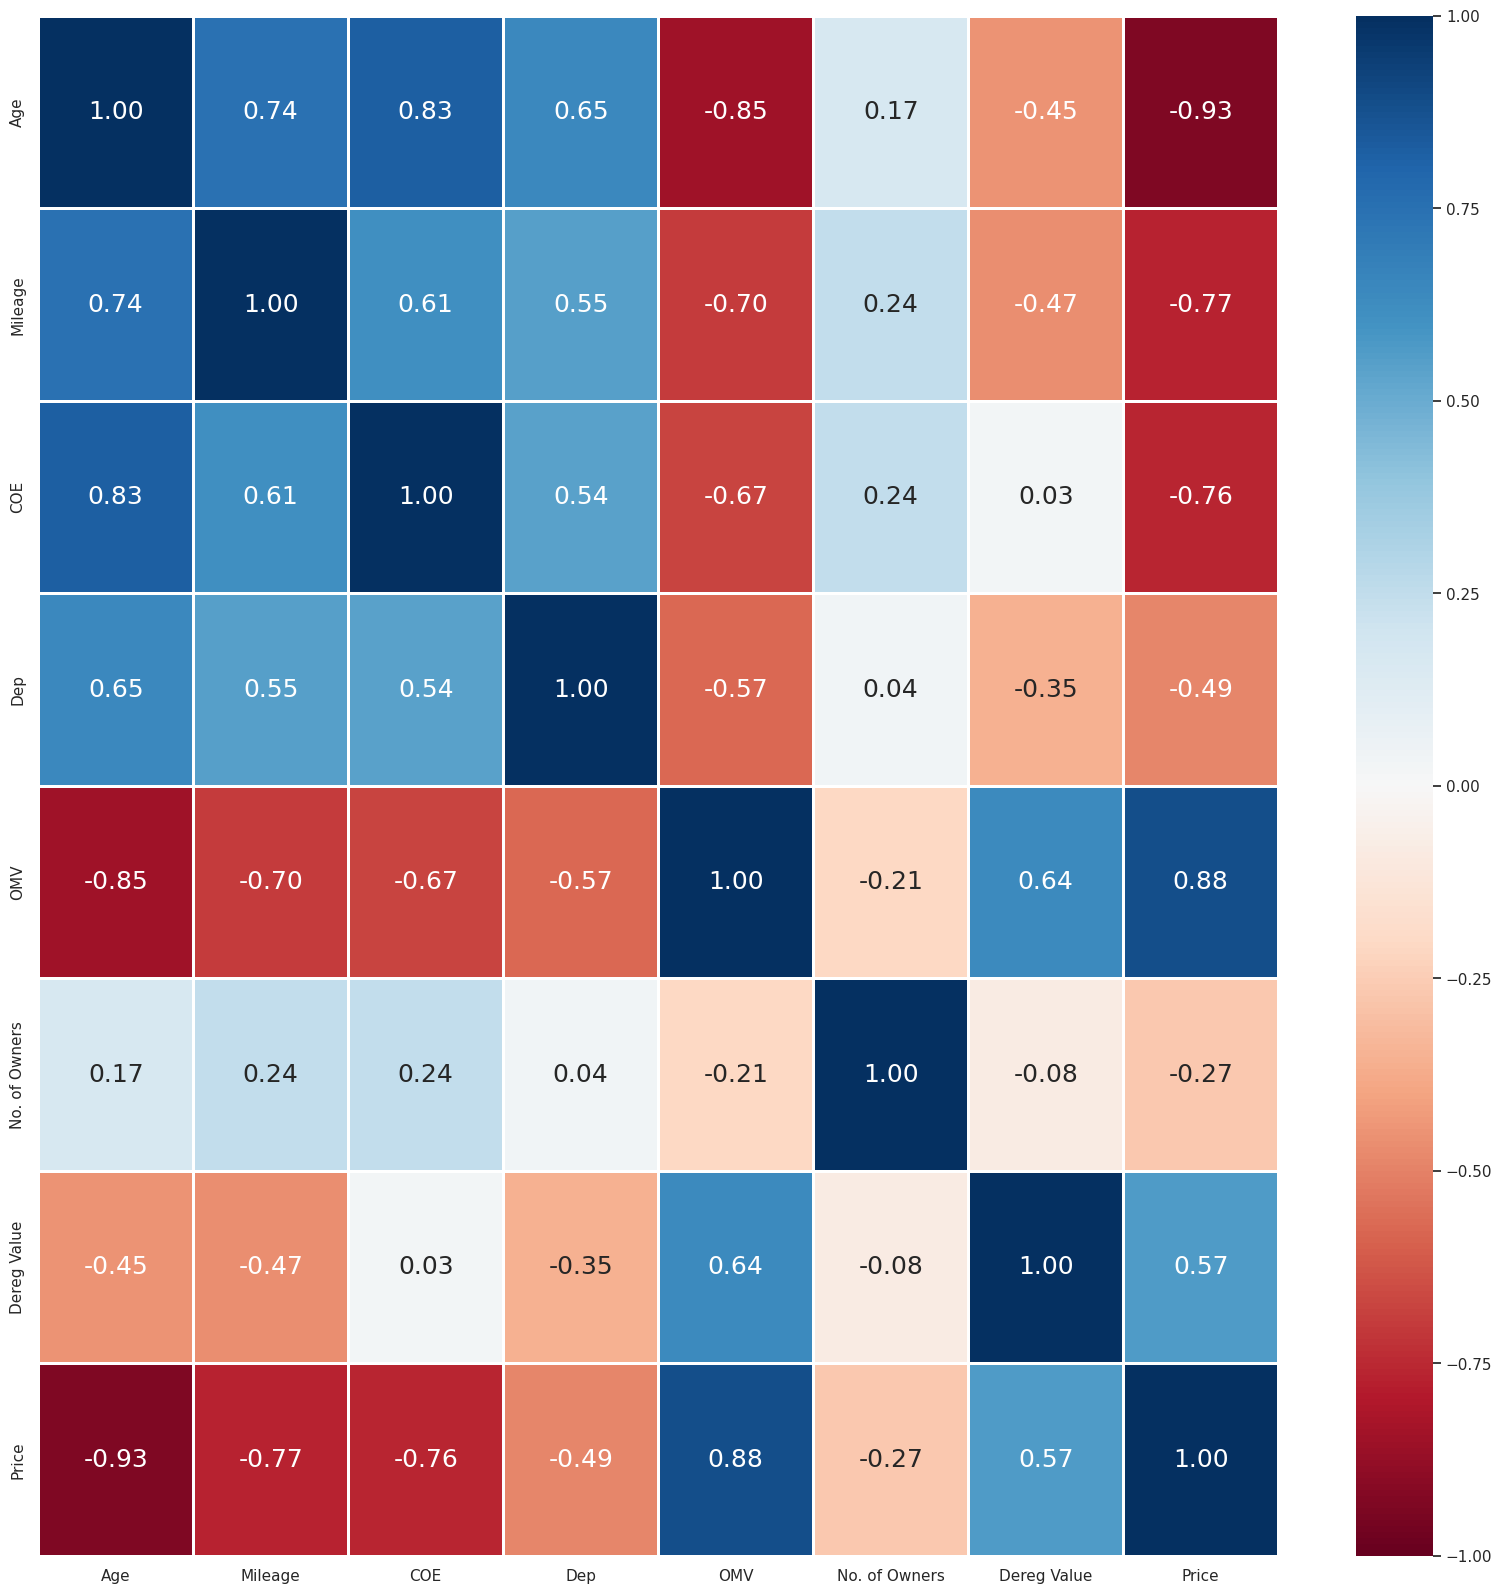

In [13]:
result = cardata[['Age', 'Mileage', 'COE', 'Dep', 'OMV', 'No. of Owners', 'Dereg Value', 'Price']].corr()
f = plt.figure(figsize=(20, 20))
sb.heatmap(result, vmin=-1, vmax=1, linewidths=1, annot=True,
           fmt=".2f", annot_kws={"size": 18}, cmap="RdBu")

Based off this heatmap, we can clearly see that No. of Owners has the least correlation with Price of the car. We have decided to remove the variable No. of Owners.

We keep Age, Mileage, COE, Depreciation, OMV and Dereg Value (6 independent variables + 1 dependent variable) and begin our Multiple Linear Regression.


## Multi-Variate Linear Regression 

Response Variable : **Price**     
Predictor Feature : **Age, Mileage, COE, Depreciation, OMV and Dereg Value**   

Regression Model : Total = $a_1$ $\times$ Age + $a_2$ $\times$ Mileage + $a_3$ $\times$ COE + $a_4$ $\times$ Depreciation + $a_5$ $\times$ OMV + $a_6$ $\times$ Dereg Value + $b$


Intercept of Regression 	: b =  [50279.12478684]
Coefficients of Regression 	: a =  [[-5.82834973e+02 -4.01073120e-02 -1.38242520e+00  5.07767803e+00
  -2.10325299e+00  2.20973633e+00]]

    Predictors  Coefficients
0          Age   -582.834973
1      Mileage     -0.040107
2          COE     -1.382425
3          Dep      5.077678
4          OMV     -2.103253
5  Dereg Value      2.209736

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9912786047109877
Mean Squared Error (MSE) 	: 1569233.3738412526

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8332785583670155
Mean Squared Error (MSE) 	: 16764010.185128713



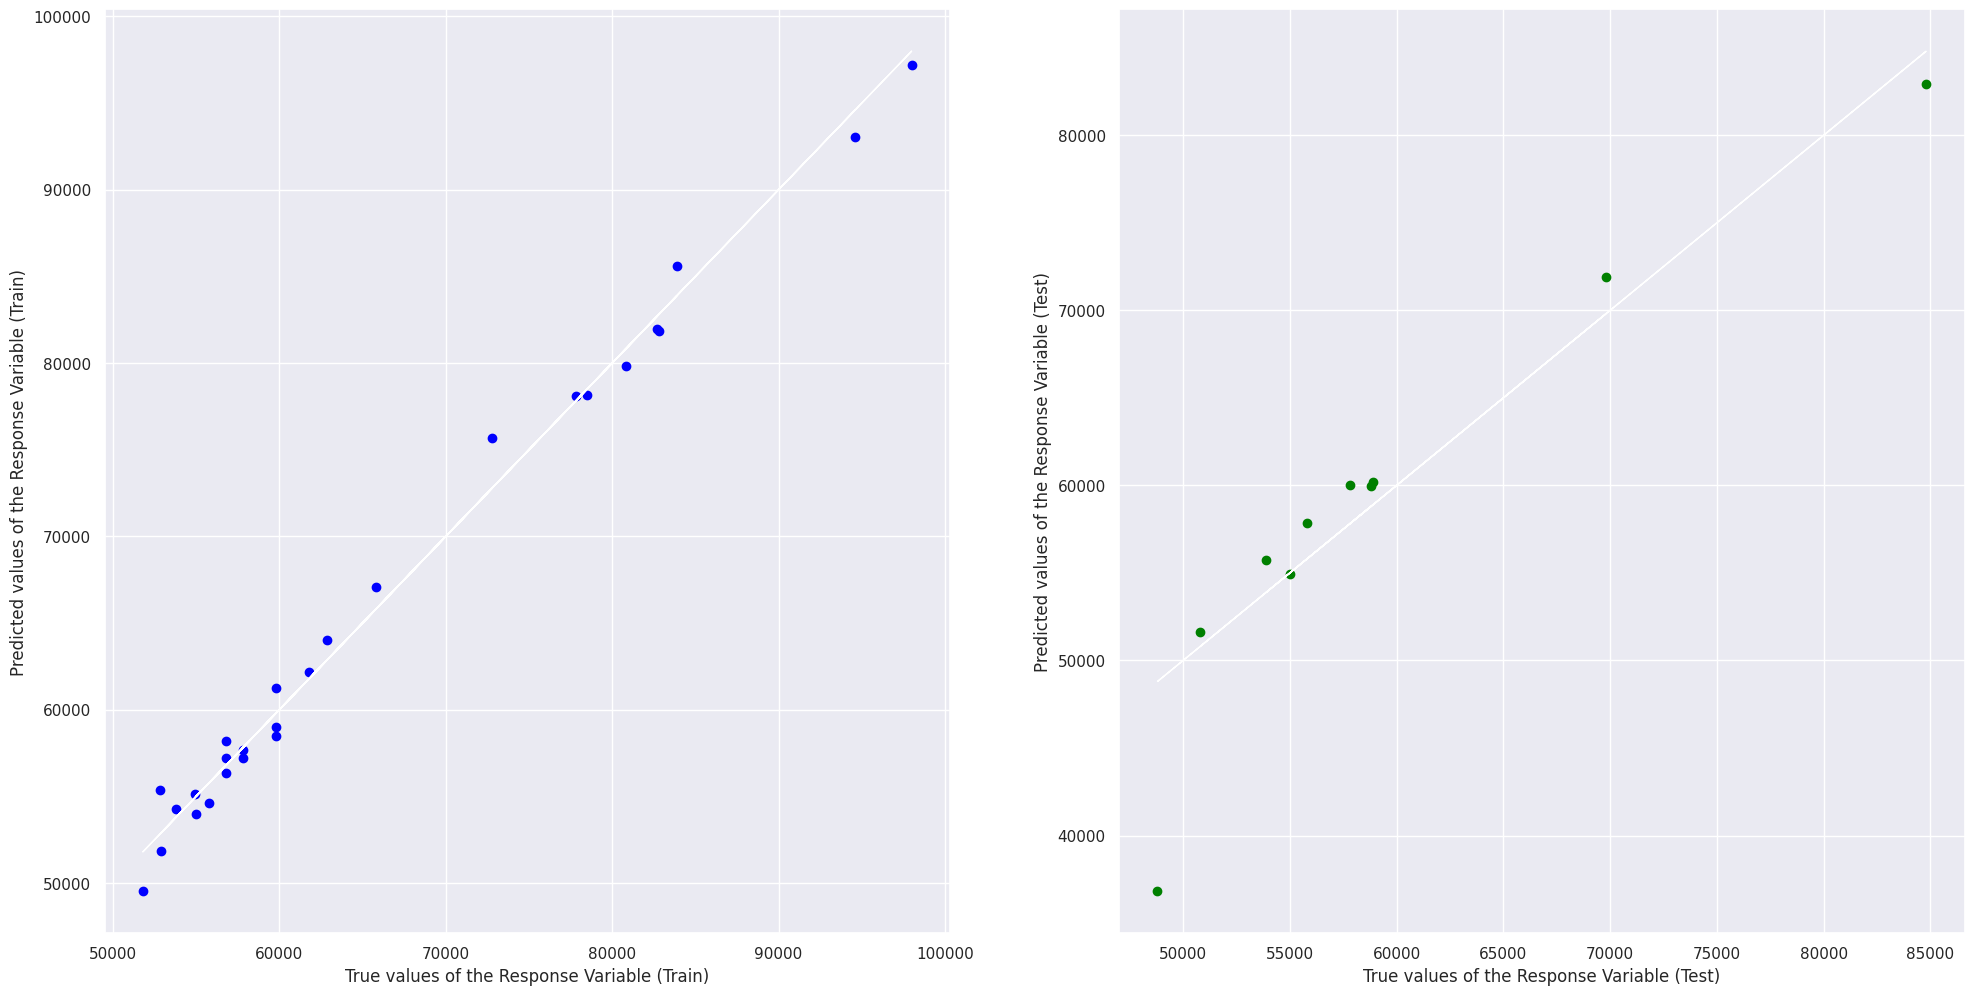

In [14]:
# Extract Response and Predictors
y = pd.DataFrame(cardata['Price'])
X = pd.DataFrame(cardata[['Age', 'Mileage', 'COE', 'Dep', 'OMV', 'Dereg Value']])

# Reshape the input data to 2D array format
price_2d = np.array('Price').reshape(-1, 1)
age_2d = np.array('Age').reshape(-1, 1)
mileage_2d = np.array('Mileage').reshape(-1, 1)
coe_2d = np.array('COE').reshape(-1, 1)
dep_2d = np.array('Dep').reshape(-1, 1)
omv_2d = np.array('OMV').reshape(-1, 1)
dereg_2d = np.array('Dereg Value').reshape(-1, 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Total values corresponding to Price
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

### Can we do better?

## Hypothesis Testing (F-test)

We conducted an F-test for our data to determine the significance of our 5 variables in predicting price. The test was conducted at a significance level, α, of 0.05 to determine if each variable is statistically significant in the regression.

We use F-values together with their corresponding P-Values to determine the significance of the overall results. P-Value is defined as the smallest possible value of α required to reject 𝐻0. 

The P-Value is the probability of observing a value of F that equals or exceeds the F-Value. This is the probability of obtaining a sample from the population that is more extreme than the ones observed in the data, assuming 𝐻0 is true. P – Value = P (F ≥ F – Value)

In [15]:
# Perform an F-test for Price against each variable
cols = ['Age', 'Mileage', 'COE', 'Dep', 'OMV', 'Dereg Value']
for col in cols:
    f_value, p_value = f_oneway(cardata['Price'], cardata[col])
    print(f"F-test for Price and {col}")
    print("F-value:", f_value)
    print("p-value:", p_value)
    print("")

F-test for Price and Age
F-value: 889.9007511194815
p-value: 2.880494346850468e-42

F-test for Price and Mileage
F-value: 0.8773327525412237
p-value: 0.35206448784318445

F-test for Price and COE
F-value: 53.37336901474662
p-value: 3.007400805994121e-10

F-test for Price and Dep
F-value: 630.9860395789453
p-value: 2.335881603777543e-37

F-test for Price and OMV
F-value: 399.0452809647319
p-value: 4.369659580270454e-31

F-test for Price and Dereg Value
F-value: 183.21283485230032
p-value: 1.8069295951471085e-21



The high p-Value for Mileage indicates the large extent of errors that the inclusion of mileage introduces to the regression model. 

Hence, Mileage is rejected from the regression and we conclude that this variable is statistically insignificant in predicting Price.


### Refined Multi-Variate Linear Regression

Response Variable : **Price**     
Predictor Feature : **Age, COE, Depreciation, OMV and Dereg Value**   

Regression Model : Total = $a_1$ $\times$ Age + $a_2$ $\times$ COE + $a_3$ $\times$ Depreciation + $a_4$ $\times$ OMV + $a_5$ $\times$ Dereg Value + $b$


Intercept of Regression 	: b =  [16619.67499295]
Coefficients of Regression 	: a =  [[-3.67371658e+03 -9.18236316e-01  7.27481333e+00 -1.34741658e+00
   1.82056158e+00]]

    Predictors  Coefficients
0          Age  -3673.716582
1          COE     -0.918236
2          Dep      7.274813
3          OMV     -1.347417
4  Dereg Value      1.820562

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9803660433539636
Mean Squared Error (MSE) 	: 3568682.6044912897

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9355602521724383
Mean Squared Error (MSE) 	: 8234039.382268401



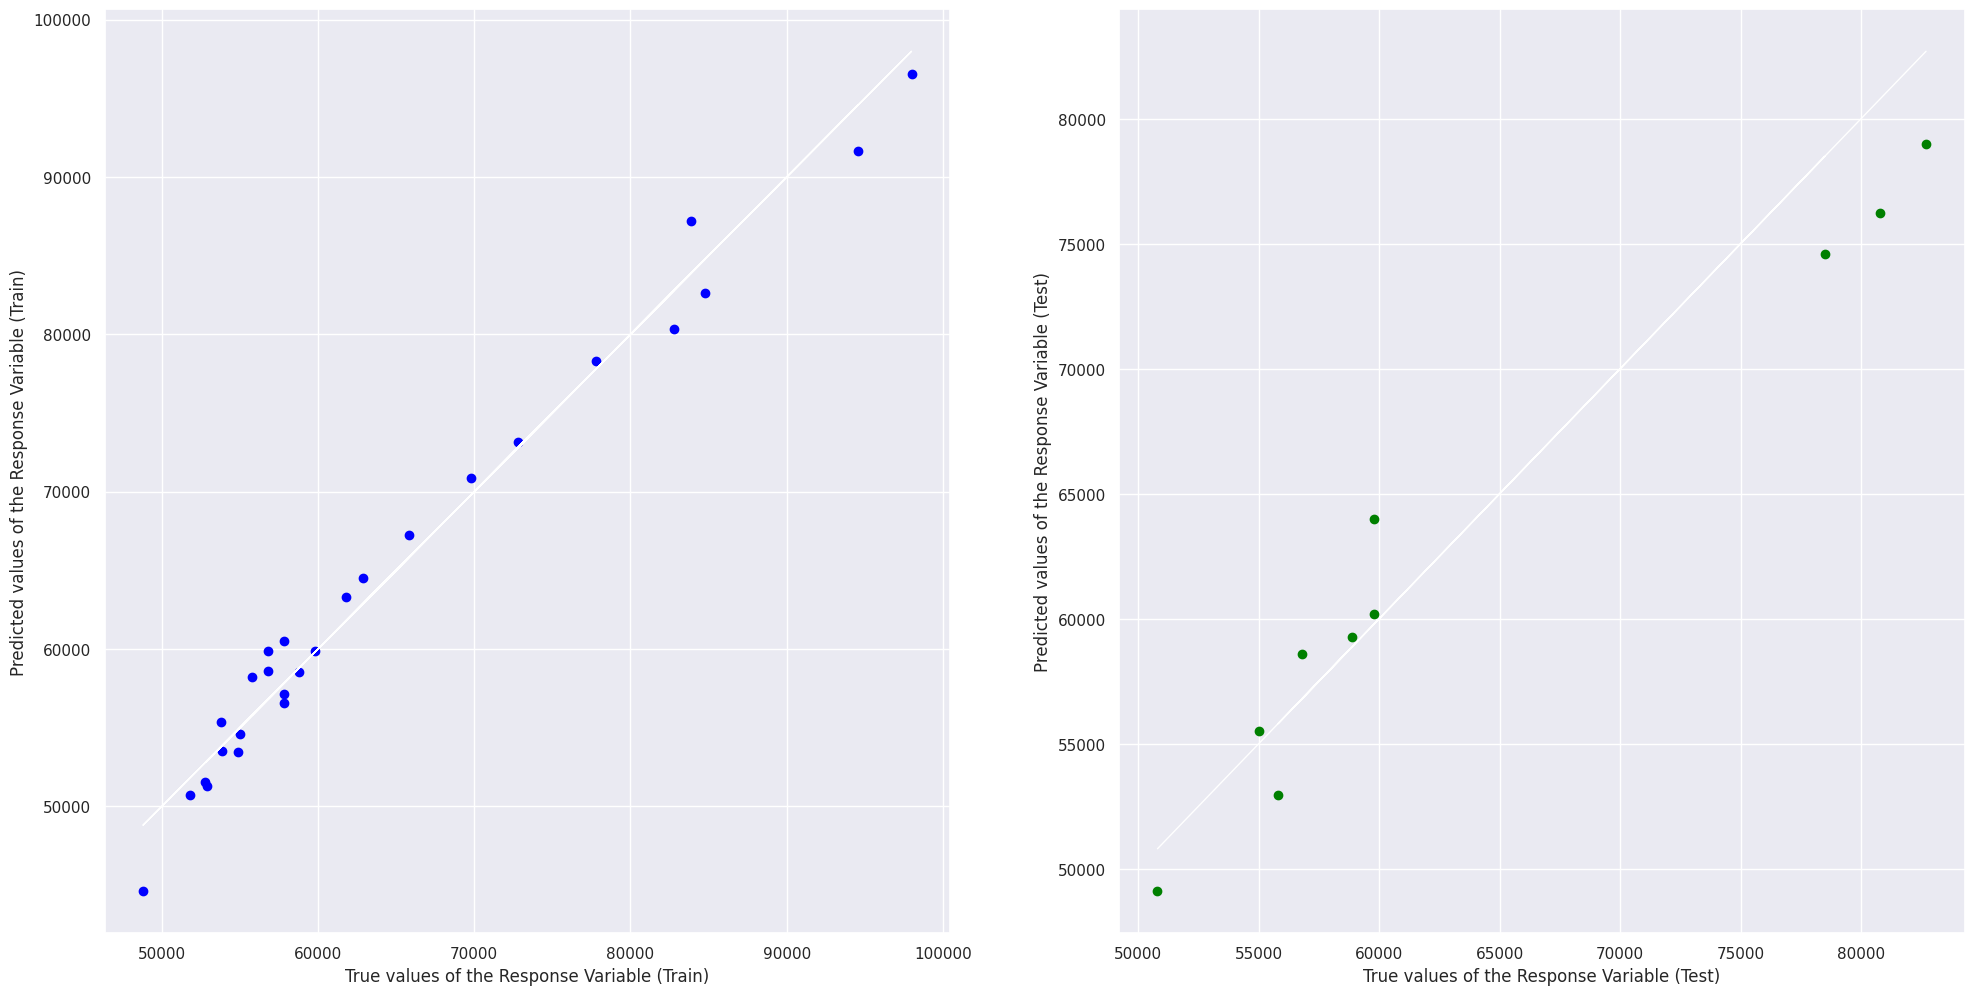

In [16]:
# Extract Response and Predictors
y = pd.DataFrame(cardata['Price'])
X = pd.DataFrame(cardata[['Age', 'COE', 'Dep', 'OMV', 'Dereg Value']])

# Reshape the input data to 2D array format
price_2d = np.array('Price').reshape(-1, 1)
age_2d = np.array('Age').reshape(-1, 1)
coe_2d = np.array('COE').reshape(-1, 1)
dep_2d = np.array('Dep').reshape(-1, 1)
omv_2d = np.array('OMV').reshape(-1, 1)
dereg_2d = np.array('Dereg Value').reshape(-1, 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Total values corresponding to Price
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

After rejecting Mileage and removing it from the predictors, the R^2 value of both the test dataset model improved, from 0.83328 to 0.93556 respectively. As such, we can confirm that the model improved after rejecting Mileage as a predictor.

In [17]:
cardata.describe()


,Dep,Mileage,Road Tax,Dereg Value,COE,Manufactured,OMV,Power,No. of Owners,Price,Unnamed: 18,Age
count,37.000000,37.000000,37.0,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000,0.0,37.000000
mean,10111.351351,59433.162162,682.0,33436.297297,44851.864865,2016.216216,20964.621622,96.0,1.324324,64300.432432,NaN,4.783784
std,556.652506,28761.420410,0.0,4527.494505,9504.350326,1.436337,1500.241487,0.0,0.747368,13110.270572,NaN,1.436337
min,8730.000000,68.000000,682.0,27517.000000,26170.000000,2014.000000,18556.000000,96.0,1.000000,48800.000000,NaN,2.000000
25%,9680.000000,34209.000000,682.0,30172.000000,41996.000000,2015.000000,19809.000000,96.0,1.000000,55000.000000,NaN,4.000000
50%,10030.000000,68000.000000,682.0,32433.000000,46489.000000,2016.000000,20472.000000,96.0,1.000000,58800.000000,NaN,5.000000
75%,10510.000000,76177.000000,682.0,36006.000000,50951.000000,2017.000000,21956.000000,96.0,1.000000,72800.000000,NaN,6.000000
max,11360.000000,121800.000000,682.0,48038.000000,68589.000000,2019.000000,24704.000000,96.0,4.000000,97988.000000,NaN,7.000000


We use the cheapest Honda Vezel 1.5A X, identified by lowest Price of $48800.0, as the base case (point of intersection of our linear regression line and the y-axis).

In [18]:
cardata

,Brand,Type,Reg_date,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE,Engine Cap,...,Transmission,OMV,ARF,Power,No. of Owners,Price,Unnamed: 18,Company_Name,Age,Car_Model
0,Honda Vezel 1.5A X,SUV,7-May-15,3yrs 11mths COE left),11360,121800,682,32433,68589,1496,...,Auto,18556,8556,96,2,48800,NaN,Honda,7,Honda Vezel 1.5A
1,Honda Vezel 1.5A X,SUV,4-Jan-16,4yrs 6mths 28days COE left),10320,62000,682,32453,56989,1496,...,Auto,19068,9068,96,1,51800,NaN,Honda,6,Honda Vezel 1.5A
2,Honda Vezel 1.5A X,SUV,20-May-16,4yrs 11mths 13days COE left),10210,68000,682,29855,46667,1496,...,Auto,20333,10467,96,3,55800,NaN,Honda,6,Honda Vezel 1.5A
3,Honda Vezel 1.5A X,SUV,6-Jan-17,5yrs 6mths 30days COE left),9440,71000,682,36006,48000,1496,...,Auto,21611,12256,96,3,58888,NaN,Honda,5,Honda Vezel 1.5A
4,Honda Vezel 1.5A X,SUV,26-Jan-18,6yrs 7mths 19days COE left),9950,25155,682,34623,36890,1496,...,Auto,22498,13498,96,1,72800,NaN,Honda,4,Honda Vezel 1.5A
5,Honda Vezel 1.5A X,SUV,10-Jun-16,5yrs 3days COE left),10330,80000,682,31119,47020,1496,...,Auto,20054,10076,96,1,56800,NaN,Honda,5,Honda Vezel 1.5A
6,Honda Vezel 1.5A X,SUV,29-Jul-16,5yrs 1mth 22days COE left),10270,80000,682,30172,44185,1496,...,Auto,19917,9917,96,1,57800,NaN,Honda,5,Honda Vezel 1.5A
7,Honda Vezel 1.5A X,SUV,14-Jul-16,5yrs 1mth 7days COE left),10700,78000,682,35960,55200,1496,...,Auto,20272,10381,96,1,59800,NaN,Honda,6,Honda Vezel 1.5A
8,Honda Vezel 1.5A X,SUV,27-Jun-19,8yrs 20days COE left),9680,28000,682,31873,26999,1496,...,Auto,22487,13482,96,1,84800,NaN,Honda,2,Honda Vezel 1.5A
9,Honda Vezel 1.5A X,SUV,6-Jan-17,5yrs 6mths 30days COE left),9960,80199,682,37220,50101,1496,...,Auto,21650,12310,96,1,61800,NaN,Honda,5,Honda Vezel 1.5A


In [19]:
cardata = cardata.reset_index(drop = True)
cardata.index

RangeIndex(start=0, stop=37, step=1)

In [20]:
# Step 1: Calculate predicted values for entire dataset
y_pred = linreg.predict(X)

# Step 2: Create new dataframe with predicted values
df = pd.DataFrame(index=cardata.index)
df['y_actual'] = y.values
df['y_pred'] = y_pred.reshape(-1)

# Step 3: Add column for difference between actual and predicted values
df['diff'] =  df['y_pred'] - df['y_actual']

# Step 4: Add boolean column for whether difference is positive
df['above_regline'] = df['diff'] > 0

# Step 5: Filter dataframe for rows where actual price is above predicted price
df_above_regline = df.loc[df['above_regline']]

# Step 6: Create new dataframe containing only the rows where actual price is above predicted price
worth_it = cardata.loc[df_above_regline.index]

# Step 7: Print the new dataframe
worth_it

,Brand,Type,Reg_date,Coe_left,Dep,Mileage,Road Tax,Dereg Value,COE,Engine Cap,...,Transmission,OMV,ARF,Power,No. of Owners,Price,Unnamed: 18,Company_Name,Age,Car_Model
3,Honda Vezel 1.5A X,SUV,6-Jan-17,5yrs 6mths 30days COE left),9440,71000,682,36006,48000,1496,...,Auto,21611,12256,96,3,58888,NaN,Honda,5,Honda Vezel 1.5A
4,Honda Vezel 1.5A X,SUV,26-Jan-18,6yrs 7mths 19days COE left),9950,25155,682,34623,36890,1496,...,Auto,22498,13498,96,1,72800,NaN,Honda,4,Honda Vezel 1.5A
5,Honda Vezel 1.5A X,SUV,10-Jun-16,5yrs 3days COE left),10330,80000,682,31119,47020,1496,...,Auto,20054,10076,96,1,56800,NaN,Honda,5,Honda Vezel 1.5A
6,Honda Vezel 1.5A X,SUV,29-Jul-16,5yrs 1mth 22days COE left),10270,80000,682,30172,44185,1496,...,Auto,19917,9917,96,1,57800,NaN,Honda,5,Honda Vezel 1.5A
7,Honda Vezel 1.5A X,SUV,14-Jul-16,5yrs 1mth 7days COE left),10700,78000,682,35960,55200,1496,...,Auto,20272,10381,96,1,59800,NaN,Honda,6,Honda Vezel 1.5A
9,Honda Vezel 1.5A X,SUV,6-Jan-17,5yrs 6mths 30days COE left),9960,80199,682,37220,50101,1496,...,Auto,21650,12310,96,1,61800,NaN,Honda,5,Honda Vezel 1.5A
13,Honda Vezel 1.5A X,SUV,22-May-17,5yrs 11mths 15days COE left),10020,66755,682,39583,51106,1496,...,Auto,21551,12172,96,1,65800,NaN,Honda,5,Honda Vezel 1.5A
14,Honda Vezel 1.5A X,SUV,4-Jun-19,7yrs 11mths 28days COE left),9530,34209,682,40879,36704,1496,...,Auto,23834,15368,96,1,83888,NaN,Honda,2,Honda Vezel 1.5A
19,Honda Vezel 1.5A X,SUV,20-May-16,4yrs 11mths 13days COE left),11090,68049,682,29637,46009,1496,...,Auto,19781,9781,96,2,59800,NaN,Honda,5,Honda Vezel 1.5A
20,Honda Vezel 1.5A X,SUV,29-Apr-16,4yrs 10mths 22days COE left),11110,85223,682,30718,47300,1496,...,Auto,20571,10800,96,1,59800,NaN,Honda,6,Honda Vezel 1.5A


In [21]:
def model(x):
    price = (linreg.coef_[0][0] * cardata['Age'][x]) + (linreg.coef_[0][1] * cardata['COE'][x]) + (linreg.coef_[0][2] * cardata['Dep'][x]) + (linreg.coef_[0][3] * cardata['OMV'][x]) + (linreg.coef_[0][4] * cardata['Dereg Value'][x]) + linreg.intercept_
    return price

In [22]:
import pandas as pd

# Create an empty DataFrame to store the values
worth = pd.DataFrame(columns=cardata.columns)

low = 0.0
value = 0.0
idx = 0

# Loop through each row in the cardata DataFrame
for x in cardata.index:
    if cardata['Price'][x] < 60000:   # Add conditional statement
        price = model(x)
        if price > cardata['Price'][x]:
            value = price - cardata['Price'][x]
            if value > low:
                low = value
                idx = x
            print(x, price, cardata['Price'][x], value, "yes")
            # Add the row to the worth DataFrame
            worth.loc[x] = cardata.loc[x]
        else:
            value = price - cardata['Price'][x]
            print(x, price, cardata['Price'][x], value, "no")
    else:
        print(x, "Price > 60000")

# Print the row with the highest value
print(idx)

# Print the worth DataFrame
print(worth)


0 [44608.23921882] 48800 [-4191.76078118] no
1 [50714.22513922] 51800 [-1085.77486078] no
2 [52957.72997356] 55800 [-2842.27002644] no
3 [59282.10714142] 58888 [394.10714142] yes
4 Price > 60000
5 [59857.40579491] 56800 [3057.40579491] yes
6 [60484.6412098] 57800 [2684.6412098] yes
7 [59883.79885839] 59800 [83.79885839] yes
8 Price > 60000
9 Price > 60000
10 [51529.13196865] 52800 [-1270.86803135] no
11 [54594.46480793] 55000 [-405.53519207] no
12 [53537.30542859] 53888 [-350.69457141] no
13 Price > 60000
14 Price > 60000
15 [56576.38864481] 57800 [-1223.61135519] no
16 Price > 60000
17 Price > 60000
18 [53487.97272317] 54900 [-1412.02727683] no
19 [63984.37331579] 59800 [4184.37331579] yes
20 [60174.27788052] 59800 [374.27788052] yes
21 [58215.91980835] 55800 [2415.91980835] yes
22 [55388.27763185] 53800 [1588.27763185] yes
23 [58601.59872871] 56800 [1801.59872871] yes
24 [58521.31781481] 58800 [-278.68218519] no
25 [55499.12843458] 55000 [499.12843458] yes
26 Price > 60000
27 [51299.

19 is the most worth it.

# Conclusion

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=348275c1-9f48-48f0-8426-5aab5682f993' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>